In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format ='retina'
sns.set_style("white")

In [2]:
df = pd.read_csv('bank/bank-full.csv',delimiter=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Análise de missing values

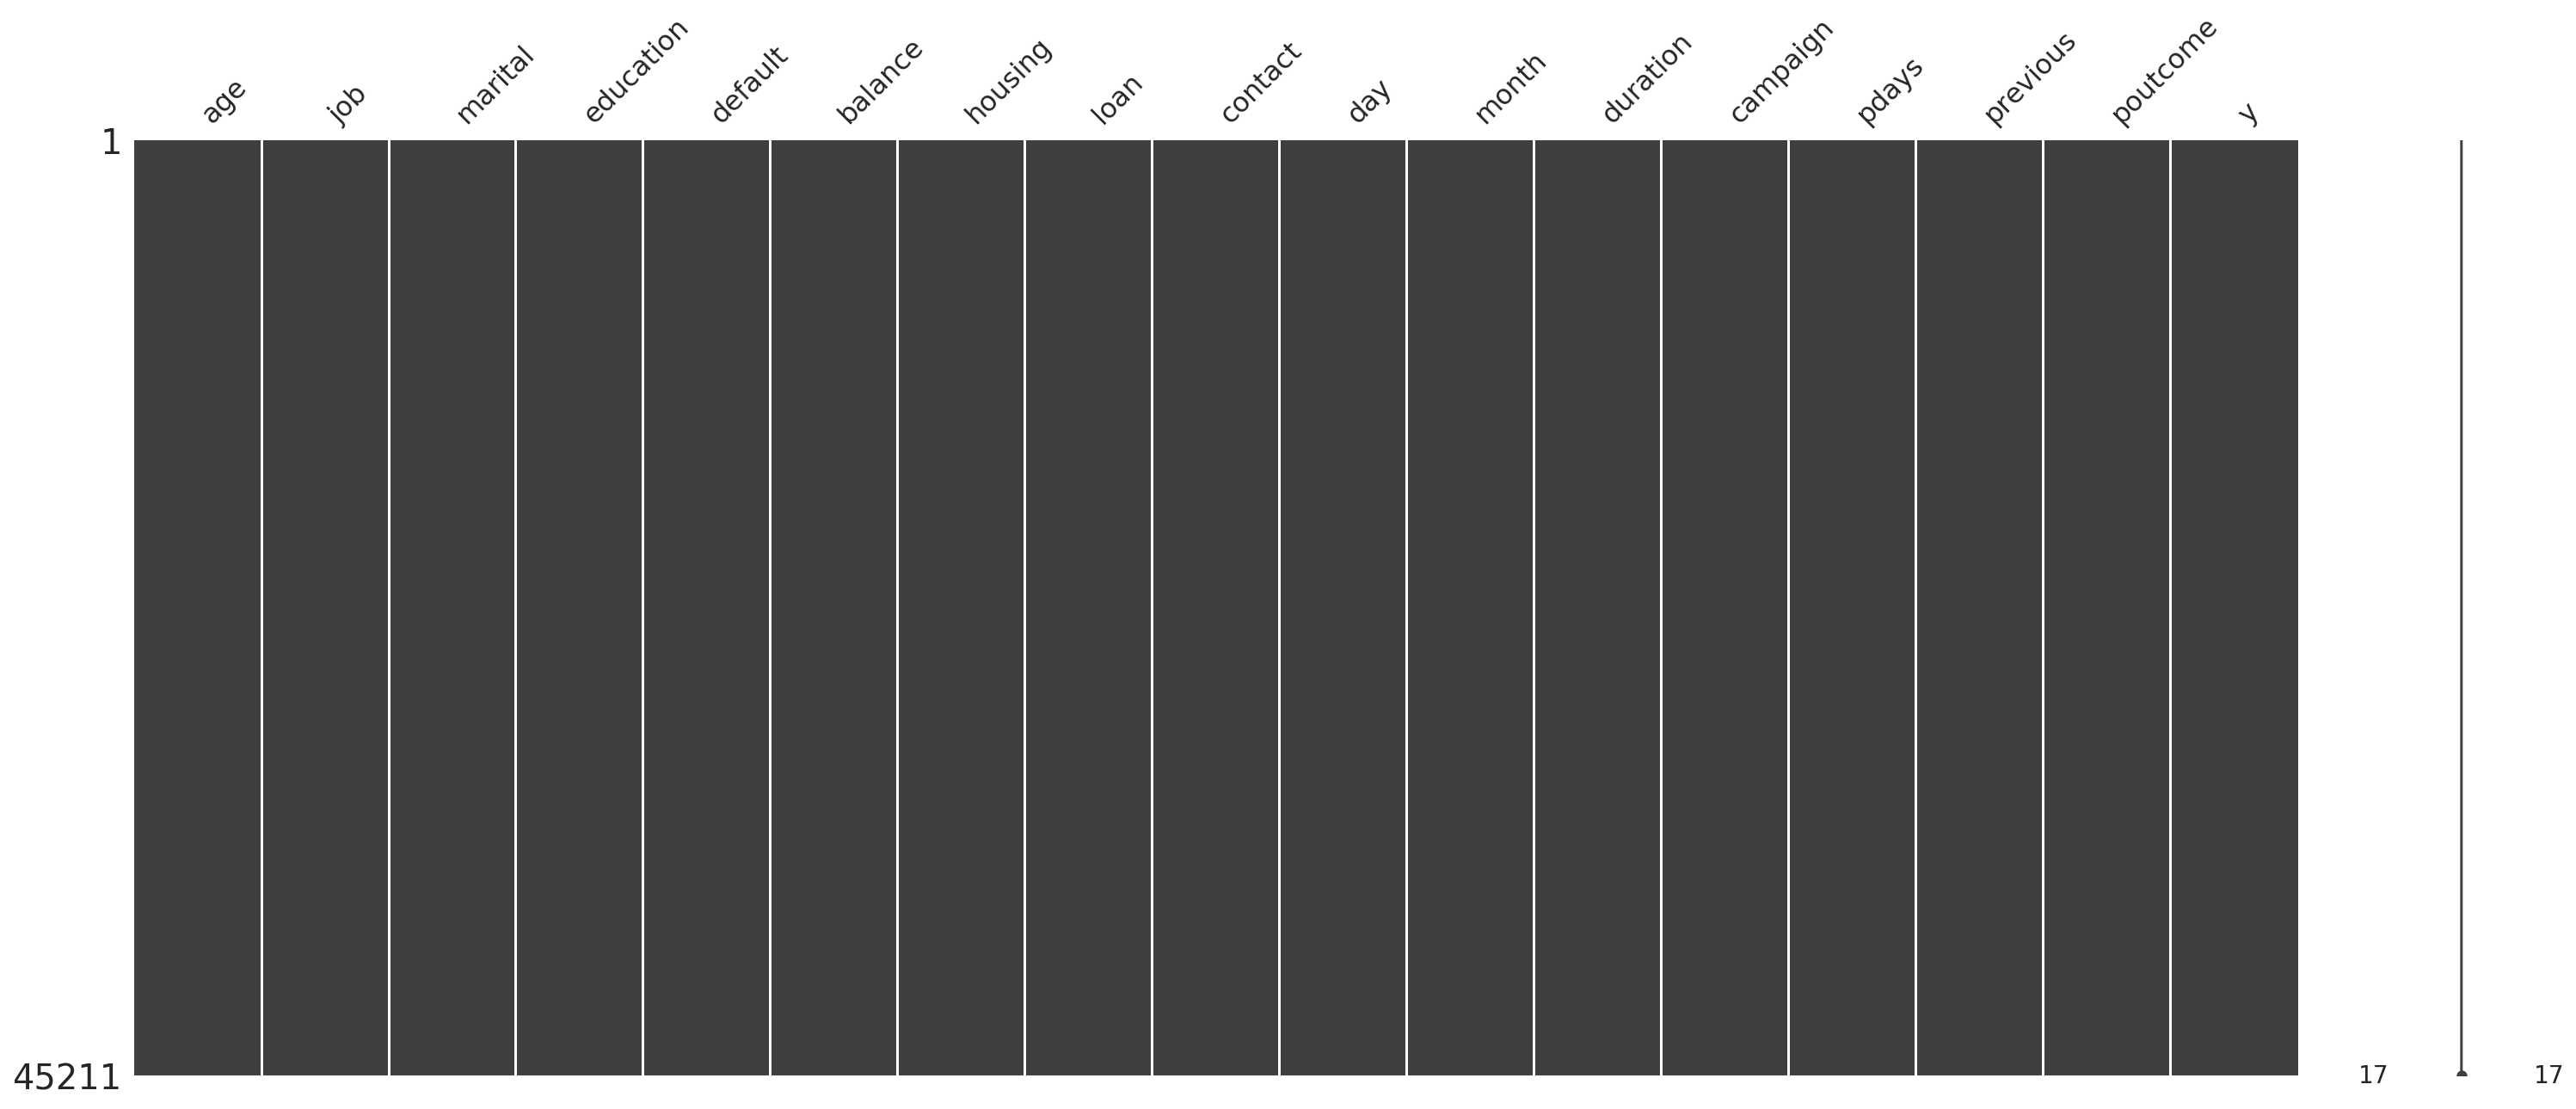

In [4]:
import missingno as msno
msno.matrix(df)

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# QUESTÃO 1
## Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?

### Para empréstimo normal

In [7]:
df_loan = pd.DataFrame()
df_loan['yes'] = df[df['loan'] == 'yes']['job'].value_counts()
df_loan['no'] = df[df['loan'] == 'no']['job'].value_counts()
df_loan

,yes,no
blue-collar,1684,8048
technician,1309,6288
management,1253,8205
admin.,991,4180
services,836,3318
entrepreneur,356,1131
retired,309,1955
self-employed,229,1350
housemaid,152,1088
unemployed,109,1194


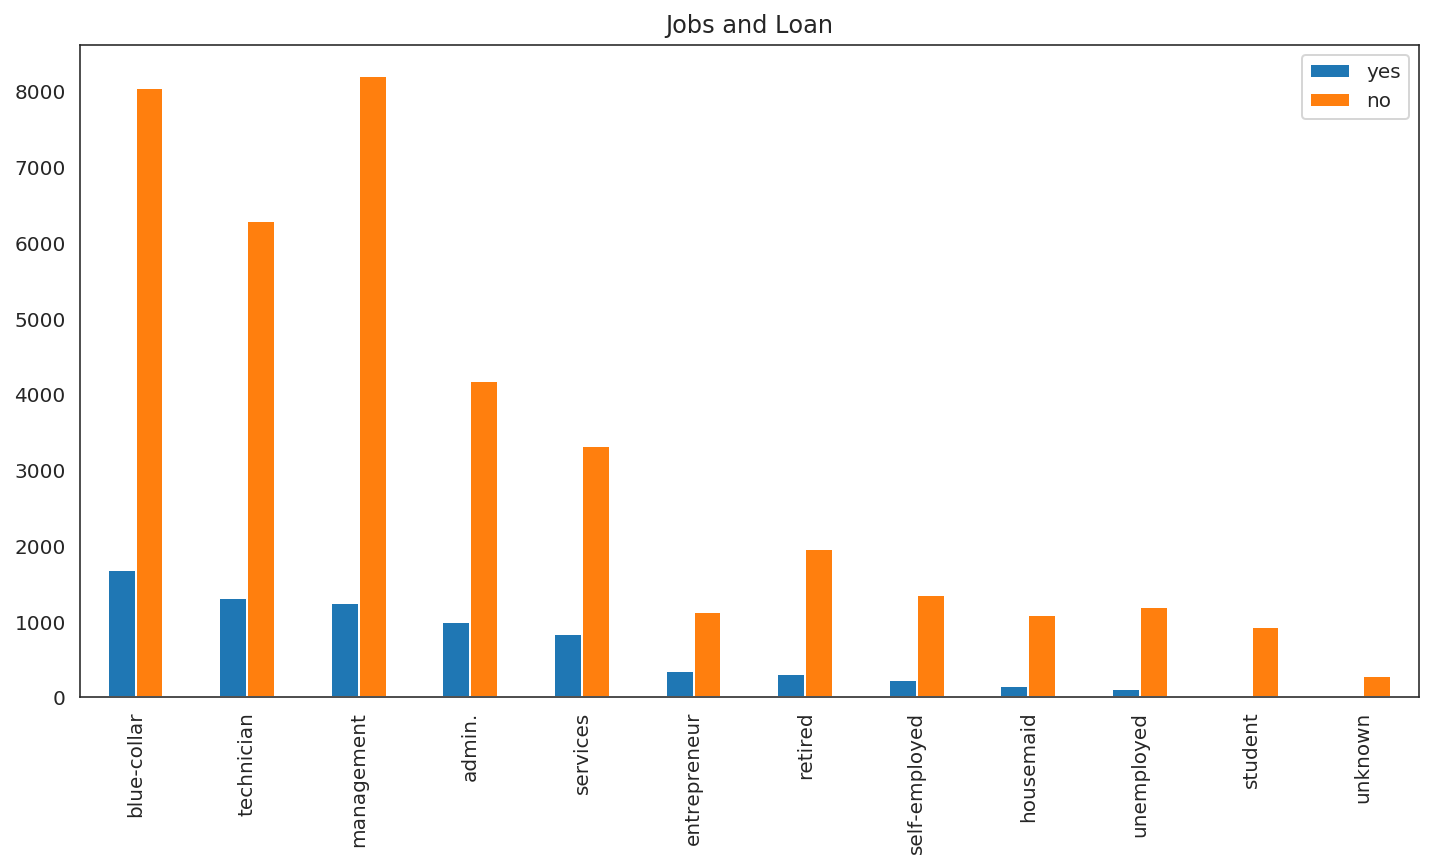

In [8]:
df_loan.plot.bar(title = 'Jobs and Loan',figsize=(12,6))

### Para empréstimo mobiliário

In [9]:
df_housing = pd.DataFrame()
df_housing['yes'] = df[df['housing'] == 'yes']['job'].value_counts()
df_housing['no'] = df[df['housing'] == 'no']['job'].value_counts()
df_housing

,yes,no
blue-collar,7048,2684
management,4678,4780
technician,4115,3482
admin.,3182,1989
services,2766,1388
entrepreneur,869,618
self-employed,765,814
unemployed,543,760
retired,491,1773
housemaid,398,842


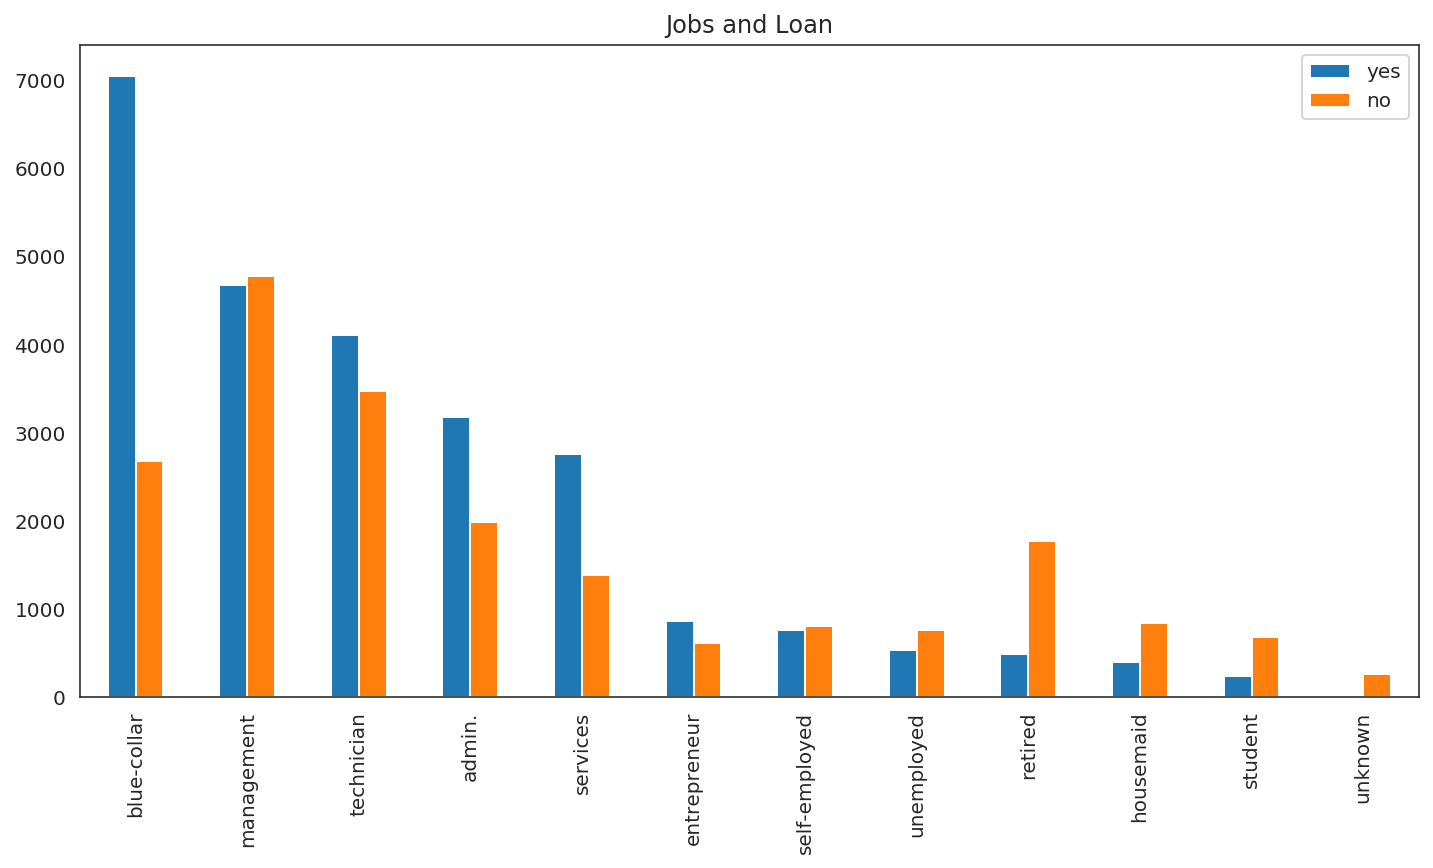

In [10]:
df_housing.plot.bar(title = 'Jobs and Loan',figsize=(12,6))

#### A profissão blue-collar é a que mais tem tendência a fazer um empréstimo, tanto para comprar um imóvel quanto normal

# QUESTÃO 2
## Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Campanha atual

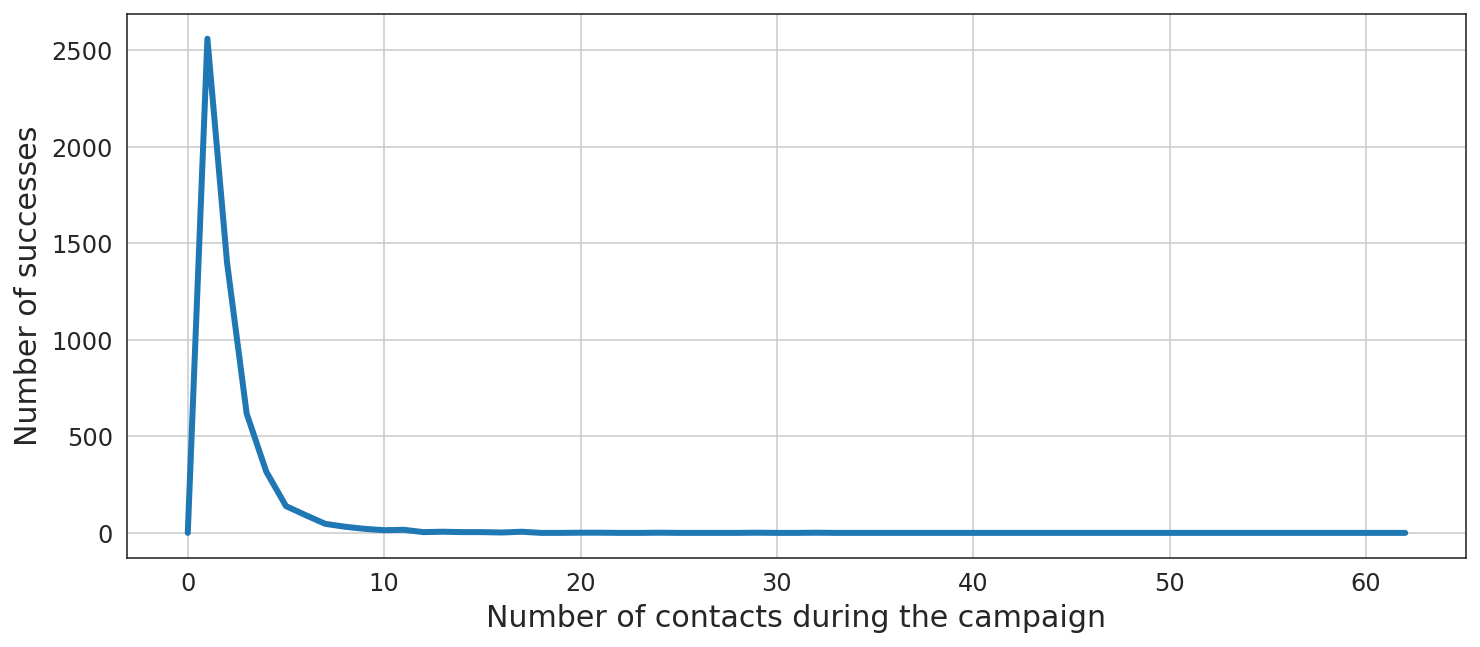

In [12]:
plt.figure(figsize=(12,5))
success = {}
for num in range(0,df['campaign'].max()):
    success[num] = sum(df[df['campaign'] == num]['y'] == 'yes')
plt.plot(list(success.keys()),list(success.values()),linewidth=3)
plt.xlabel('Number of contacts during the campaign', fontsize=15)
plt.ylabel('Number of successes', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()

In [13]:
df_suc = pd.DataFrame()
df_suc['Succeded'] = success.values()
df_suc['Number of contacts'] = success.keys()
df_suc.sort_values(by='Succeded', ascending=False).head(15)

,Succeded,Number of contacts
1,2561,1
2,1401,2
3,618,3
4,317,4
5,139,5
6,92,6
7,47,7
8,32,8
9,21,9
11,16,11


### Última campanha

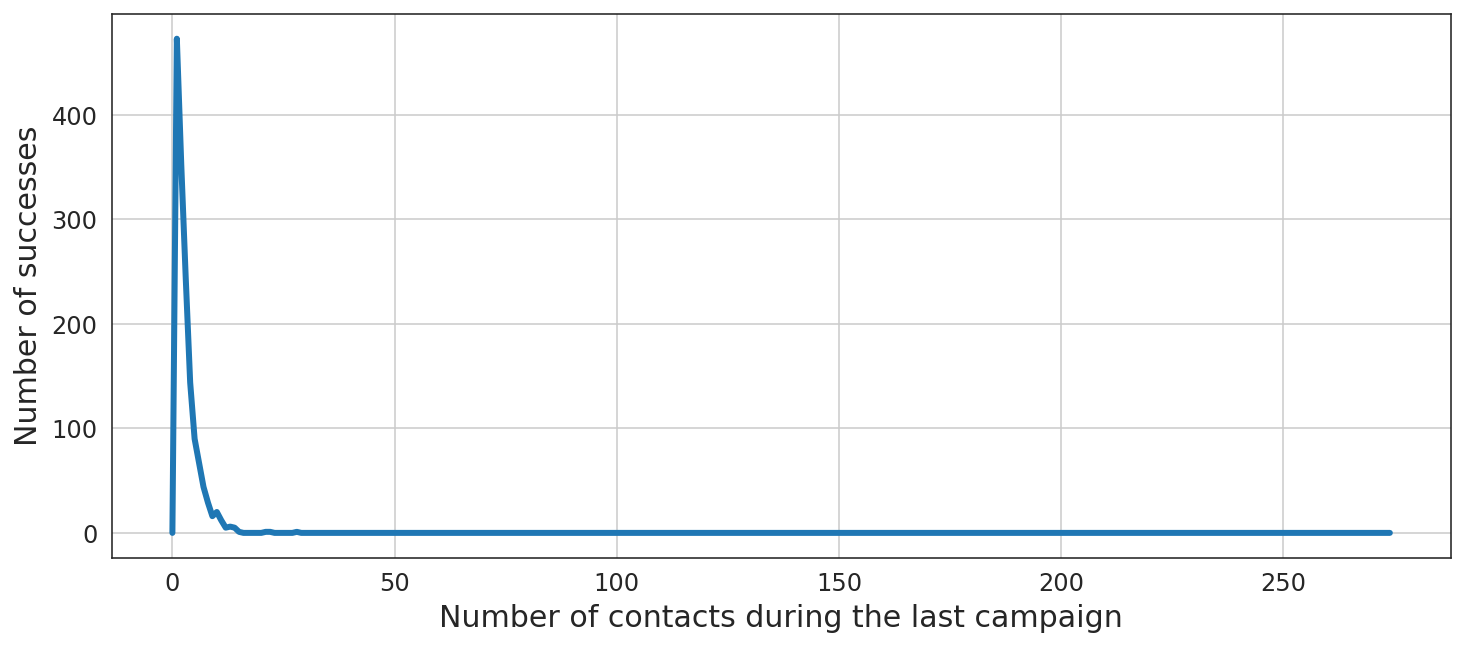

In [14]:
plt.figure(figsize=(12,5))
success = {}
for num in range(0,df['previous'].max()):
    success[num] = sum(df[df['previous'] == num]['poutcome'] == 'success')
plt.plot(list(success.keys()),list(success.values()),linewidth=3)
plt.xlabel('Number of contacts during the last campaign', fontsize=15)
plt.ylabel('Number of successes', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()

In [15]:
df_lastsuc = pd.DataFrame()
df_lastsuc['Succeded'] = success.values()
df_lastsuc['Number of last contacts'] = success.keys()
df_lastsuc.sort_values(by='Succeded', ascending=False).head(15)

,Succeded,Number of last contacts
1,473,1
2,352,2
3,244,3
4,144,4
5,90,5
6,67,6
7,44,7
8,29,8
10,20,10
9,16,9


#### O número de vezes que o banco entrou em contato não é um fator determinante para o sucesso da campanha, pois o valor de clientes que adquiriram a campanha é máximo é quando o banco entrou em contato somente uma vez

# QUESTÃO 3
## Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?

In [16]:
df_campaign = df[df.y == 'yes'].groupby('campaign').size().reset_index(name = 'count').copy()

In [17]:
df_campaign['percentage'] = (df_campaign['count']/df_campaign['count'].sum())*100

In [18]:
df_campaign

,campaign,count,percentage
0,1,2561,48.421252
1,2,1401,26.488939
2,3,618,11.684628
3,4,317,5.993572
4,5,139,2.628096
5,6,92,1.739459
6,7,47,0.888637
7,8,32,0.605029
8,9,21,0.397050
9,10,14,0.264700


In [19]:
df_campaign1 = df_campaign[df_campaign.percentage > 1].copy()
percentages_sum = 0
count_sum = 0
for index, percentages in enumerate(df_campaign['percentage']):
    if percentages < 1:
        count_sum += df_campaign['count'][index]
        percentages_sum += percentages
df_campaign1 = df_campaign1.append({"campaign":">7","count":count_sum, "percentage":percentages_sum}, ignore_index=True).copy()

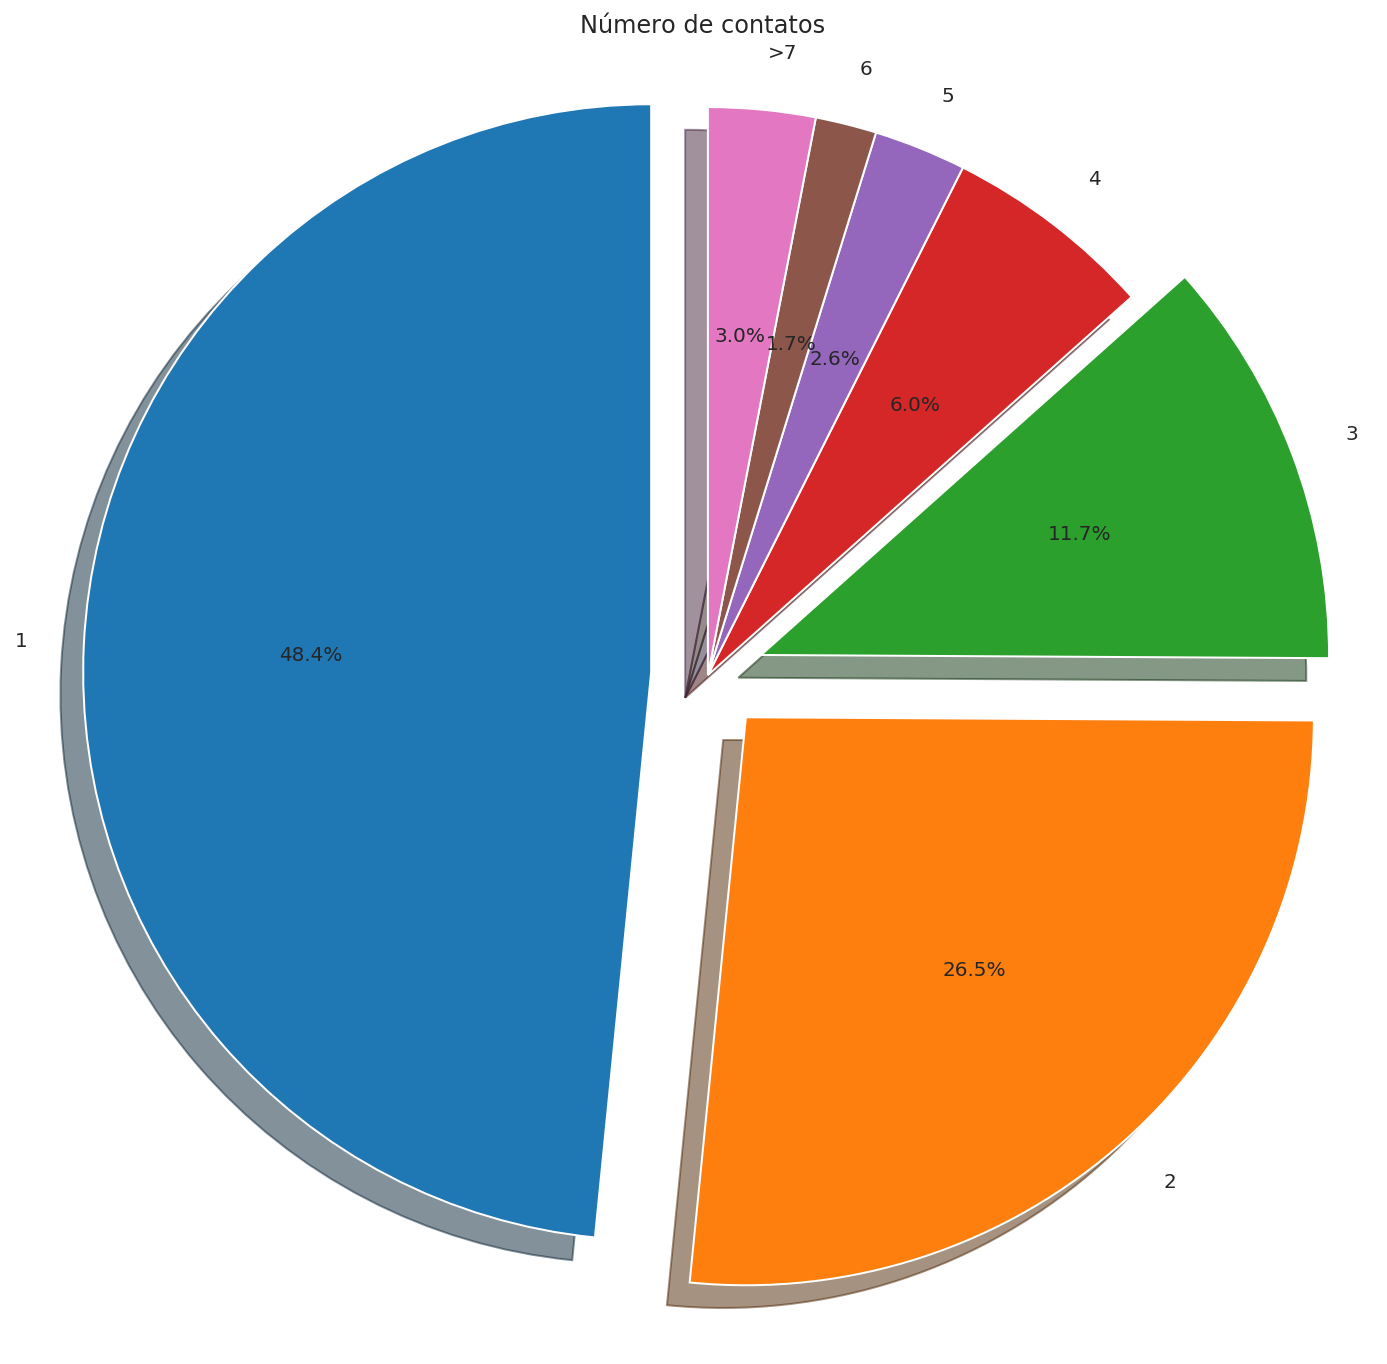

In [20]:
labels = df_campaign1['campaign']
sizes = df_campaign1['percentage']
explode = (0.1, 0.1, 0.1, 0, 0, 0, 0)

fig, ax = plt.subplots(figsize=(12,12))
ax.set_title("Número de contatos")
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [21]:
df_campaign1['percentage'].iloc[0:3].sum()

86.59481943656647

### Nota-se que entre 1 e 3 ligações resultam 86.59% do sucesso da campanha.

### Entre 1 e 3 ligações em média

# QUESTÃO 4
## O resultado da campanha anterior tem relevância na campanha atual?

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Uma maneira para ver o quanto um atributo influencia outro é medir a importância relativa de cada feature. Isso pode ser feito treinando um classificador Random Forest.

In [23]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

encoder = preprocessing.LabelEncoder()

### Transformação de variáveis categóricas para numéricas

In [24]:
df_encoded = df.apply(encoder.fit_transform)

In [25]:
df_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0


In [26]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

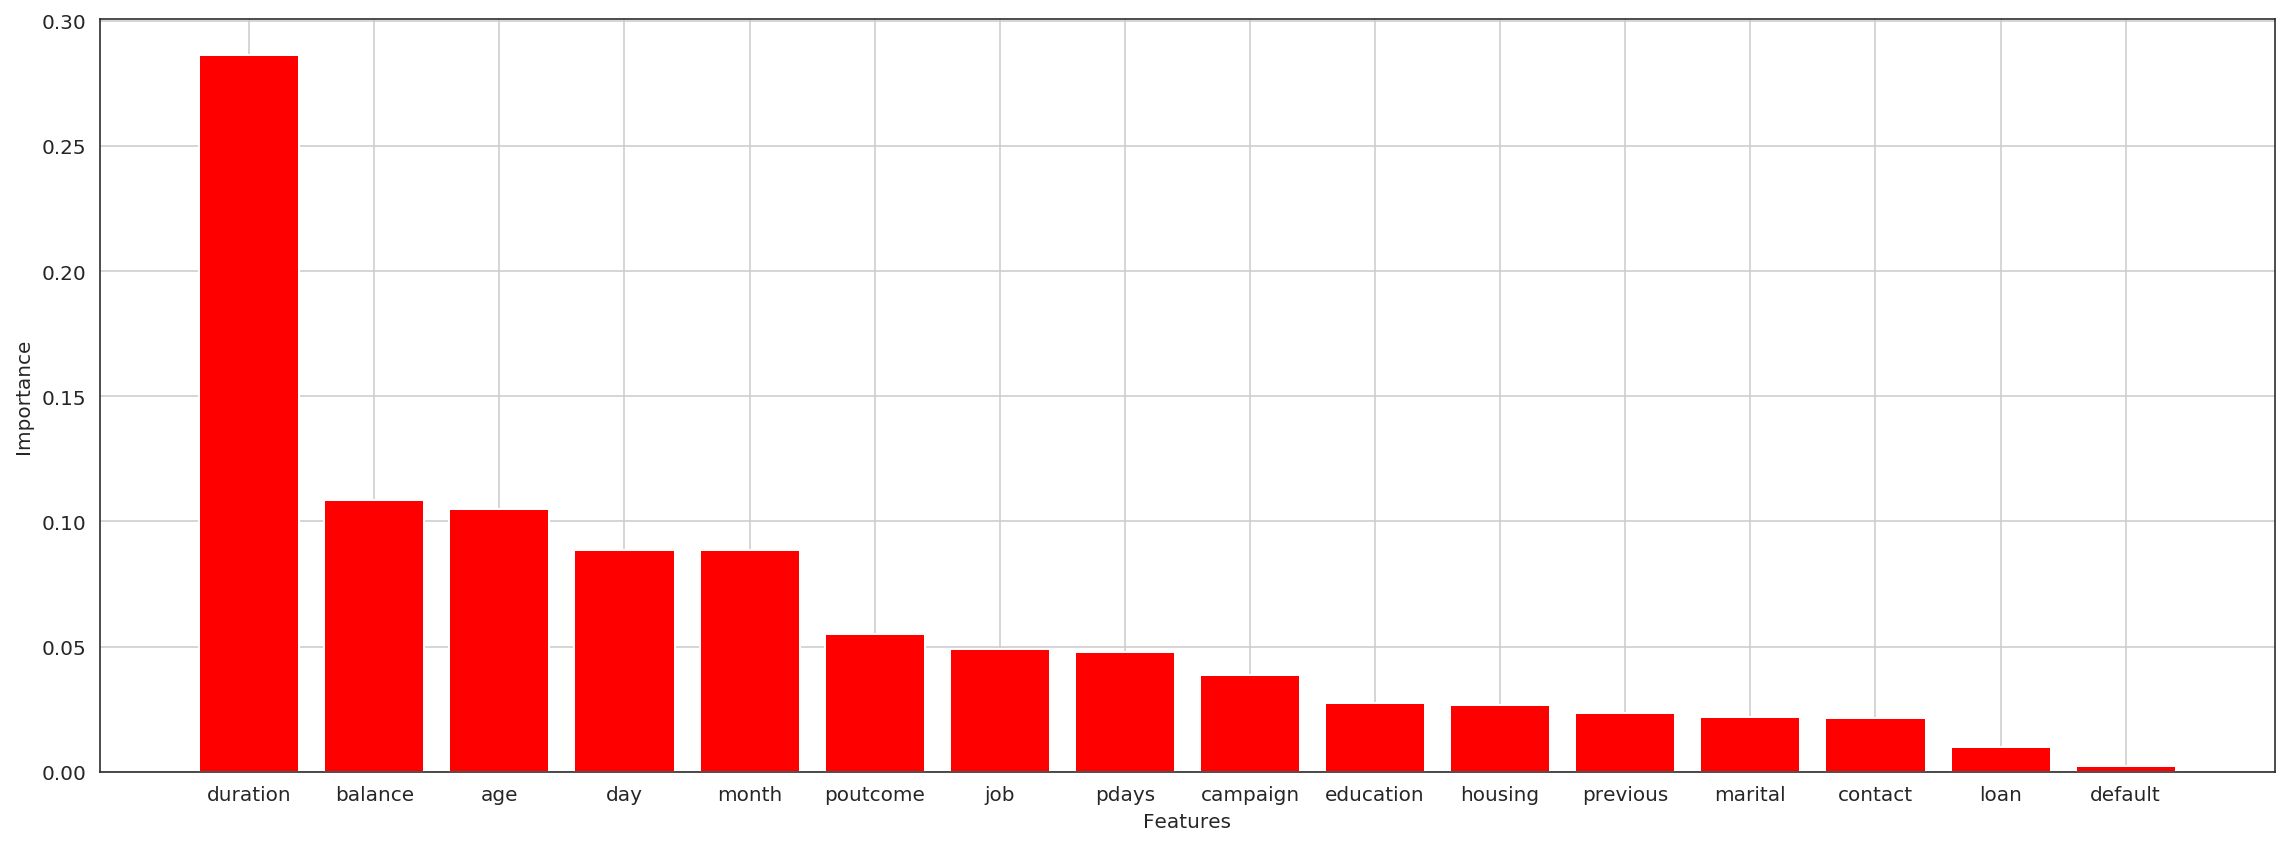

In [29]:
plt.figure(figsize=(16,6))
plt.bar(feature_importances.index, feature_importances['importance'], color='red')
plt.grid()
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()

### Pode-se ver que o resultado da campanha anterior (poutcome) possui influência na campanha atual (y), porém não é o atributo mais importante.
### Outra maneira que pode ser usada para ver a influência é analisar a matriz de correlação dos dados. Como o resultado da campanha anterior possuí valores diferentes do resultado da campanha atual (other e unknown), foram mapeados novos valores para o atributo poutcome, onde os valores other e unknown foram eliminados e usou-se failed = 0 e success = 1.

In [30]:
df_encoded.poutcome.replace({
    0: np.nan,
    1: np.nan,
    3: 0,
    2: 1
}, inplace=True)

In [31]:
df_encoded.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021872,-0.403258,-0.106829,-0.017879,0.119073,-0.185510,-0.015650,0.026229,-0.009118,-0.042359,-0.006796,0.005023,-0.024404,0.002070,0.037165,0.025130
job,-0.021872,1.000000,0.062045,0.166707,-0.006853,0.026004,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004094,0.006882,-0.025099,-0.000883,0.028393,0.040438
marital,-0.403258,0.062045,1.000000,0.108576,-0.007023,0.006913,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.012364,-0.009176,0.019636,0.018810,0.027230,0.045588
education,-0.106829,0.166707,0.108576,1.000000,-0.010718,0.071495,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.002275,0.006193,-0.001356,0.018873,0.056163,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.105660,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.009455,0.017007,-0.029970,-0.021983,-0.026781,-0.022419
balance,0.119073,0.026004,0.006913,0.071495,-0.105660,1.000000,-0.078896,-0.114077,-0.036057,0.010893,0.023925,0.038270,-0.025987,0.012325,0.039646,0.063220,0.082873
housing,-0.185510,-0.125363,-0.016096,-0.090790,-0.006025,-0.078896,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005878,-0.024178,0.127521,0.042332,-0.089210,-0.139173
loan,-0.015650,-0.033004,-0.046893,-0.048574,0.077234,-0.114077,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.013354,0.010102,-0.022699,-0.012729,-0.058836,-0.068185
contact,0.026229,-0.082063,-0.039201,-0.110928,0.015404,-0.036057,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.024421,0.019213,-0.248608,-0.178903,-0.139890,-0.148395
day,-0.009118,0.022856,-0.005261,0.022671,0.009424,0.010893,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.032022,0.163353,-0.094545,-0.058829,-0.039320,-0.028348


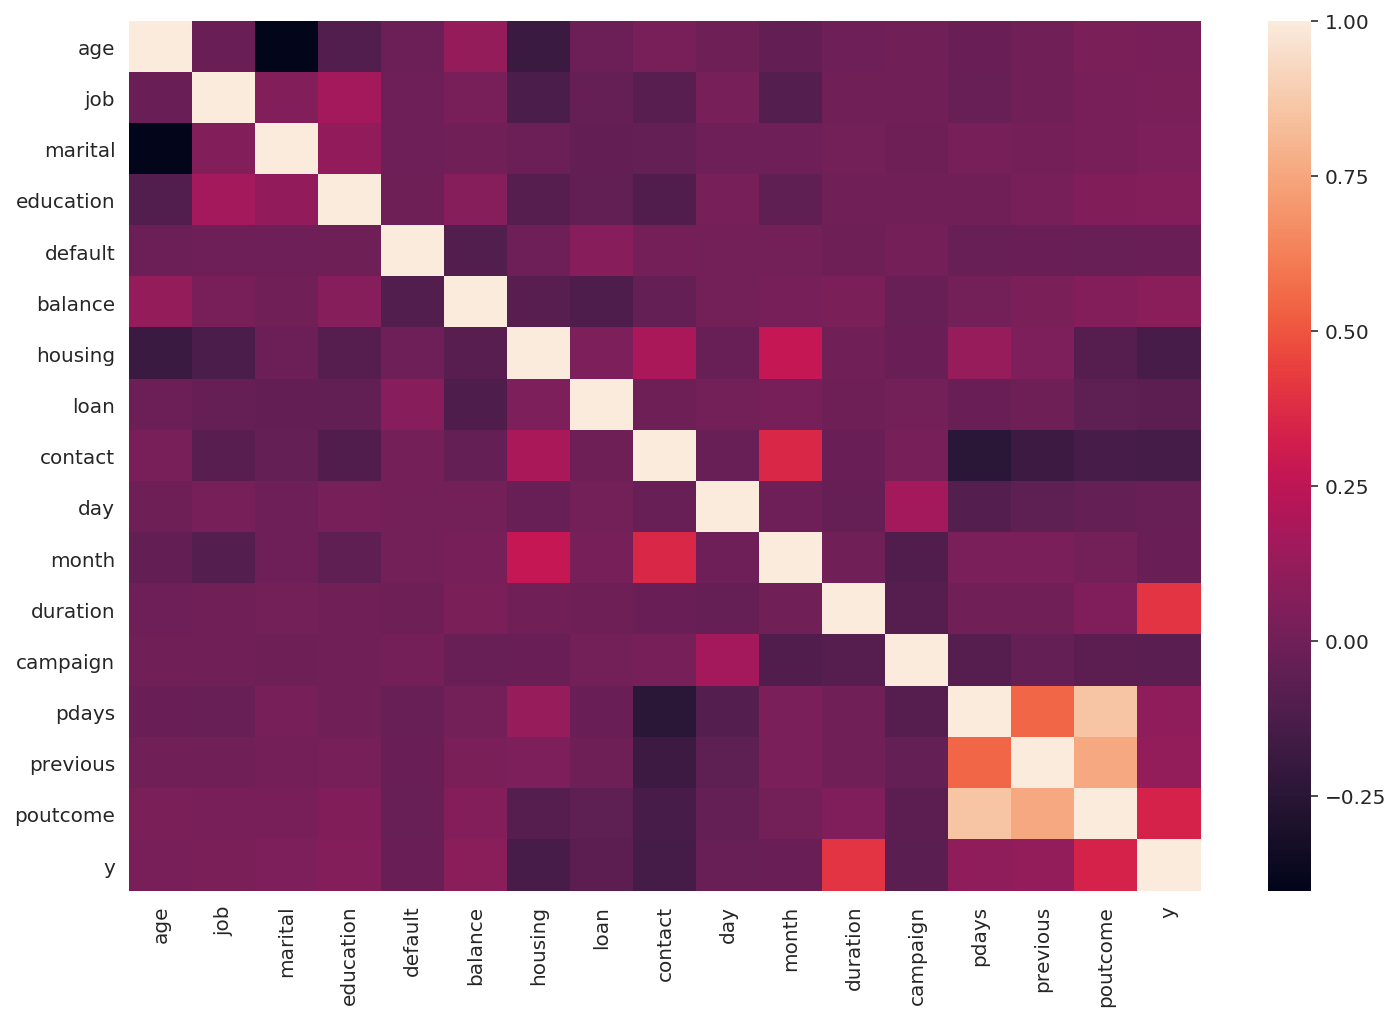

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr())

In [33]:
df_encoded.corr()['poutcome']['y']

0.3403508644220348

### Assim é possível ver que o resultado da campanha anterior tem influência positiva na campanha atual

# QUESTÃO 5
## Qual o fator determinante para que o banco exija um seguro de crédito?

### Não entendi essa pergunta. O que seria o seguro de crédito no dataset?
### Caso seja o fator determinante para o cliente aceitar o term deposit, segue abaixo

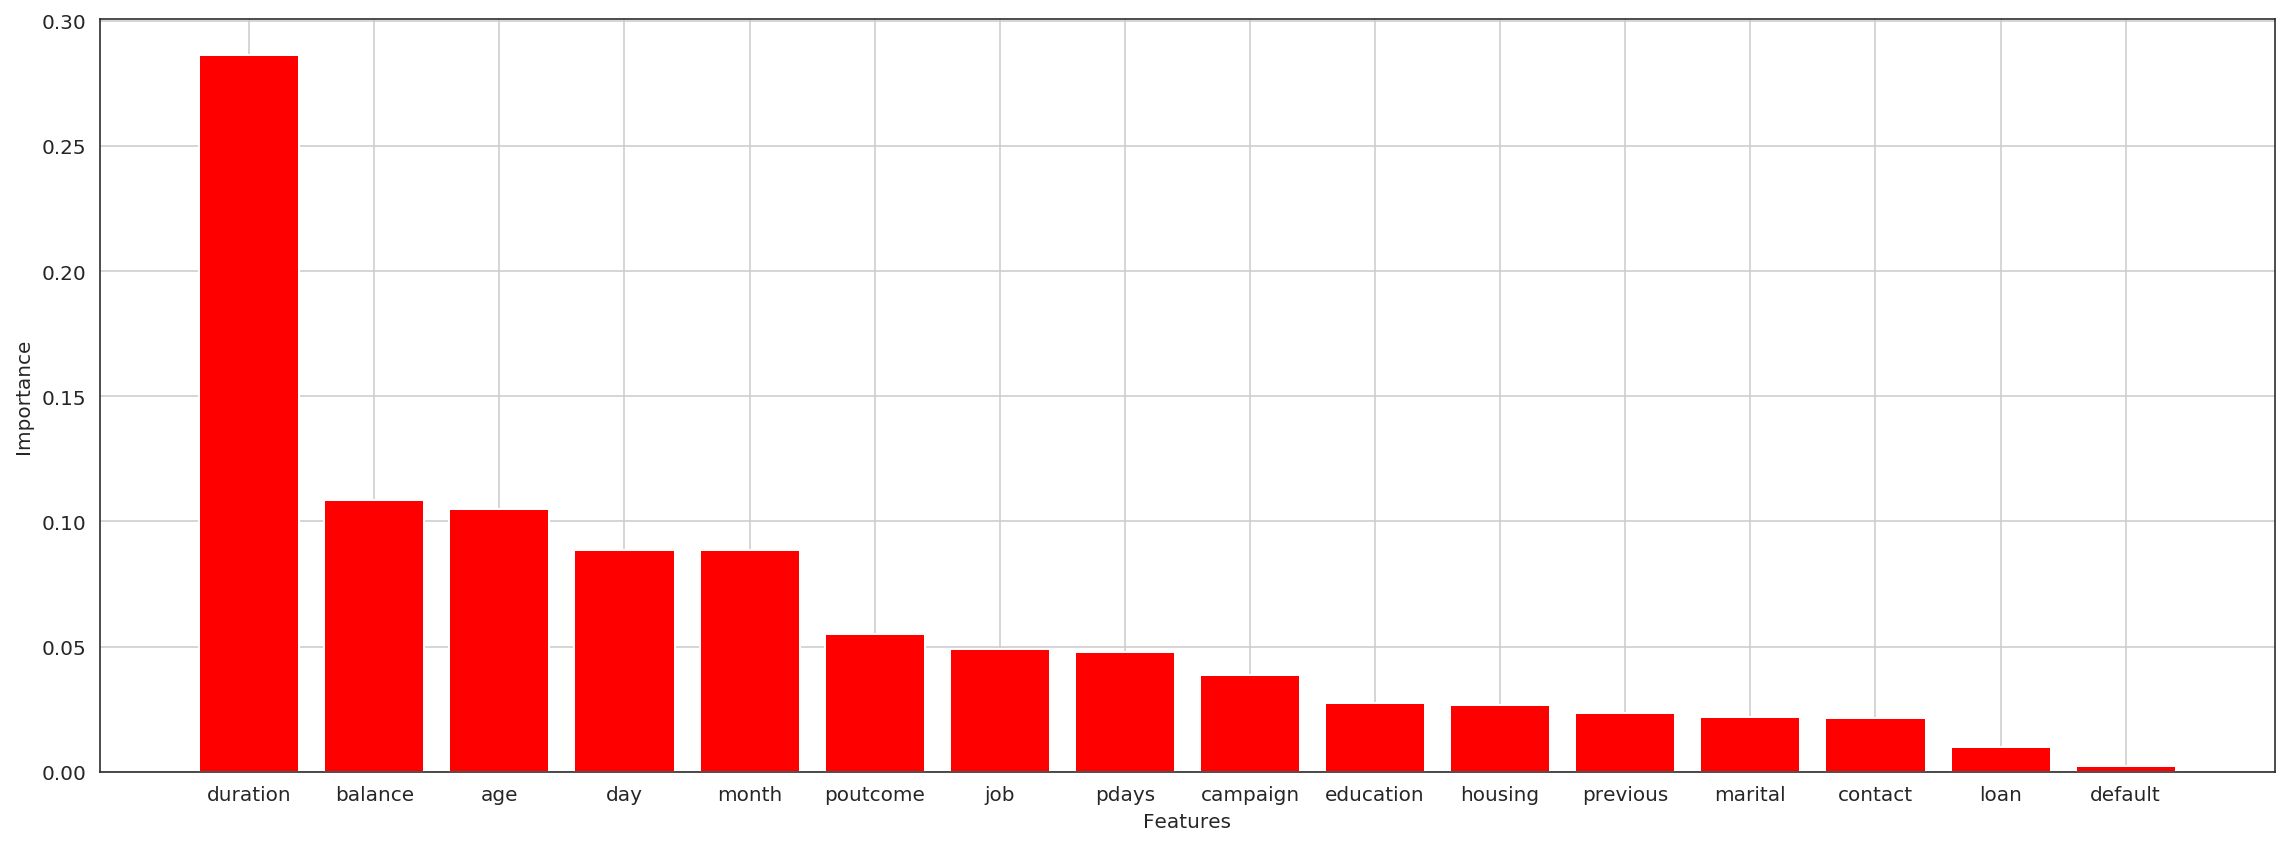

In [34]:
plt.figure(figsize=(16,6))
plt.bar(feature_importances.index, feature_importances['importance'], color='red')
plt.grid()
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()

### A feature que mais influencia na classificação é a duração da ligação com o cliente. Isso faz sentido pois quanto mais tempo o cliente conversou com o banco maior a probabilidade dele ter aceitado a oferta.
### Essa feature não deve ser utilizada para treinar o modelo de classificação, pois só é possível ter a duração da ligação após o término dela, e consequentemente, com a resposta do cliente.

# QUESTÃO 6
## Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?

In [35]:
df_housing = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan']].copy()

In [36]:
df_housing = df_housing[df_housing.housing == 'yes']
df_housing.head()

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,unknown,no,1506,yes,no
5,35,management,married,tertiary,no,231,yes,no


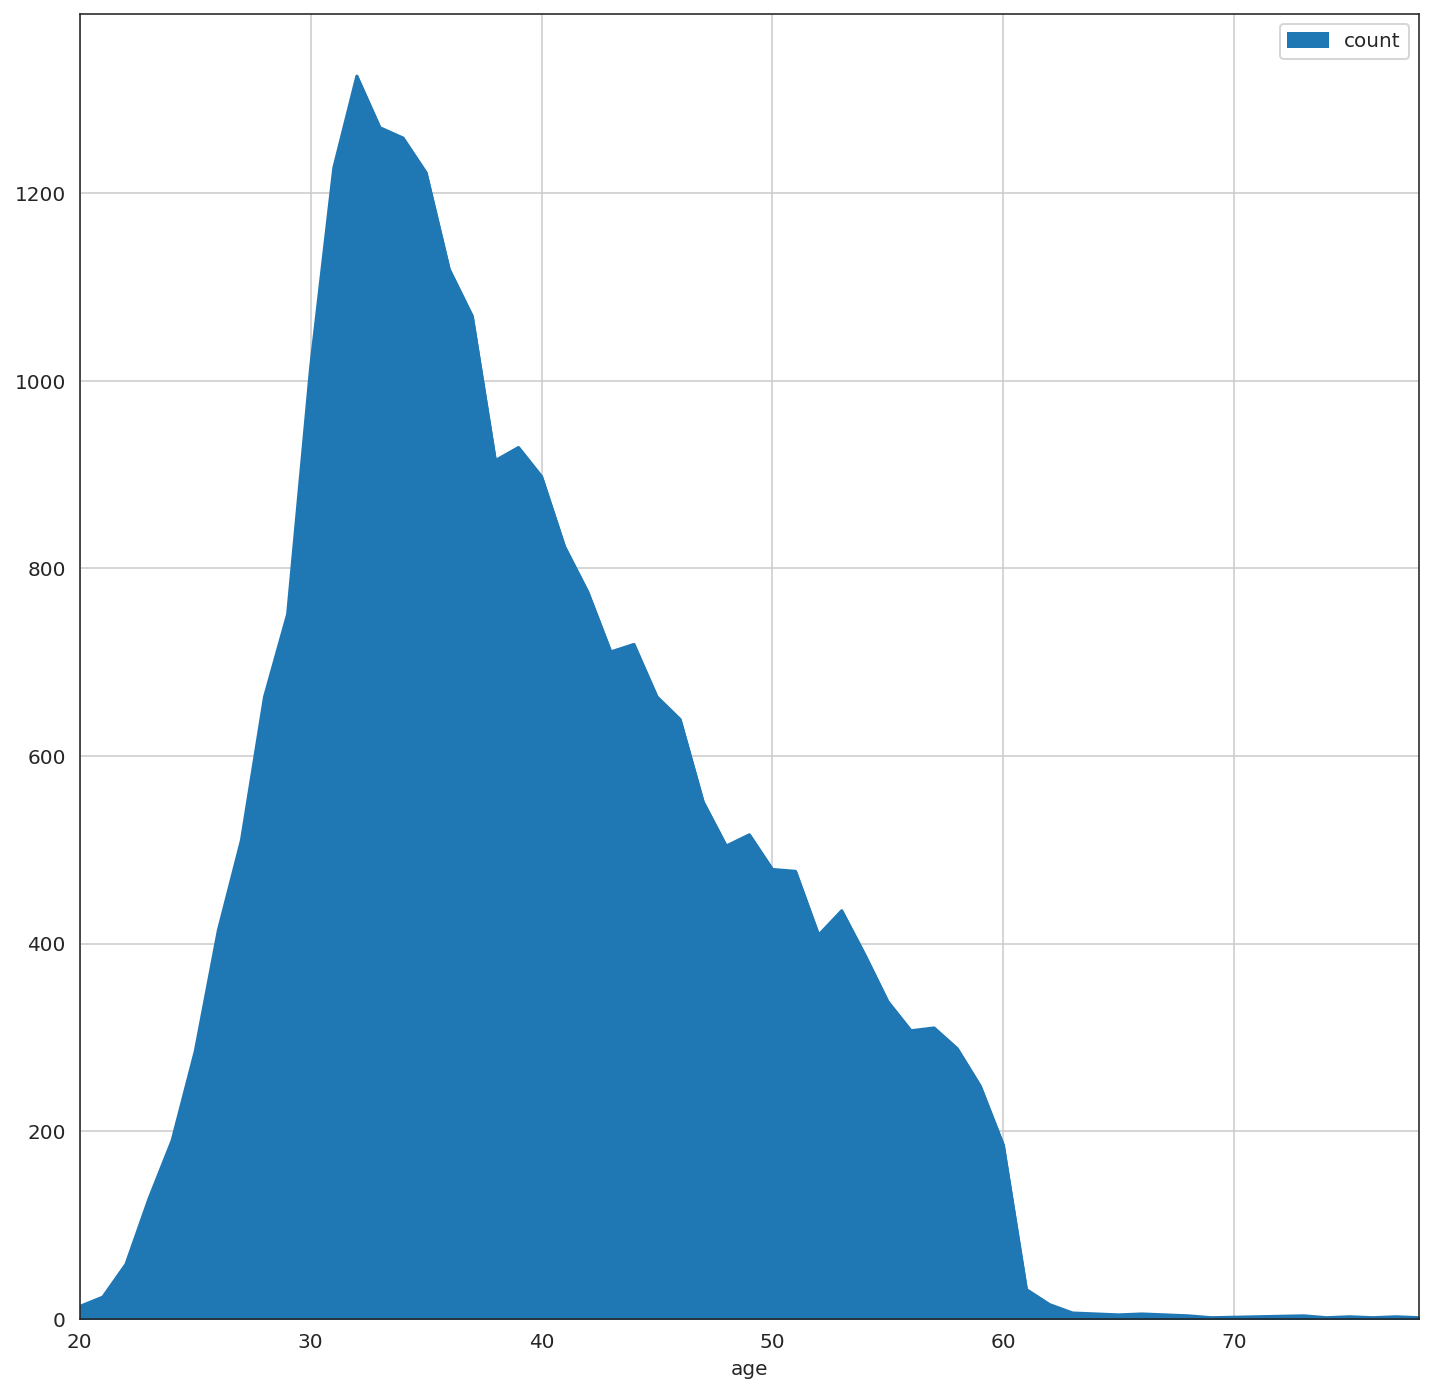

In [37]:
df_housing.groupby('age').size().reset_index(name='count').plot(x='age',y='count',kind='area', figsize=(12,12))
plt.grid()

### É possível notar que o pico de clientes que possuem empréstimo imobiliário está entre 30 e 40 anos de idade

In [38]:
df_education = df_housing.groupby('education').size().reset_index(name='count')

In [39]:
df_education

,education,count
0,primary,3894
1,secondary,14038
2,tertiary,6378
3,unknown,820


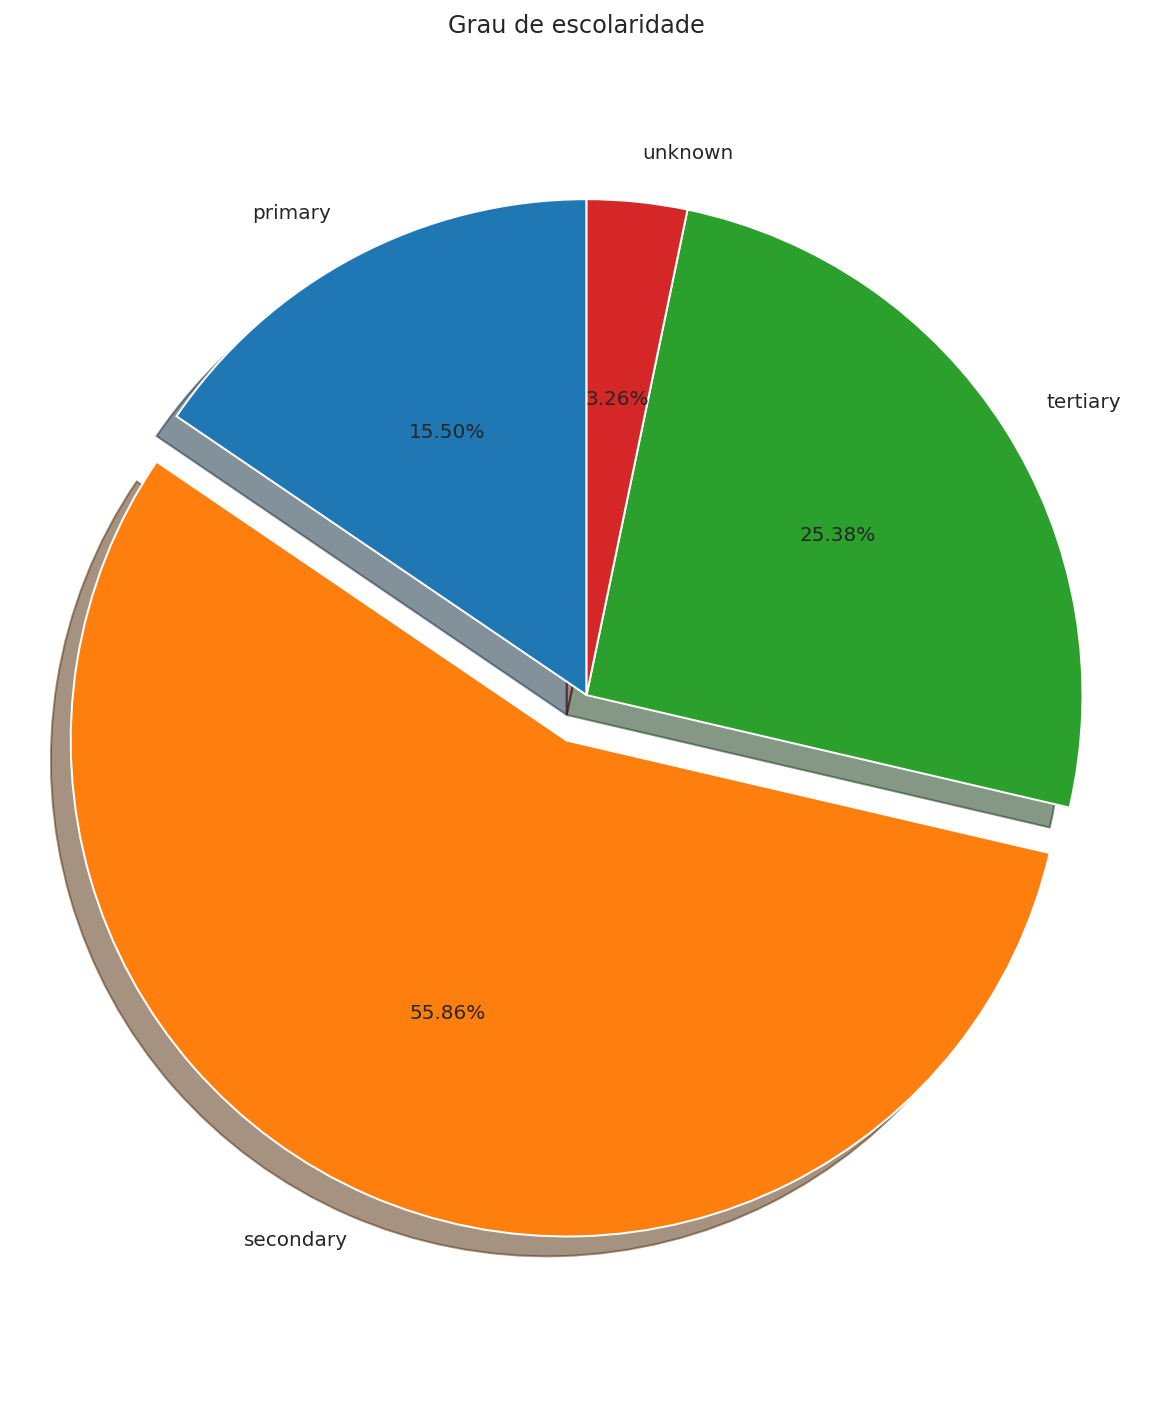

In [40]:
labels = df_education['education']
sizes = df_education['count']
explode = (0, 0.1, 0, 0)

fig, ax = plt.subplots(figsize=(12,12))
ax.set_title("Grau de escolaridade")

ax.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.75)
plt.show()

### Nota-se que a maioria das pessoas possuem ensino secundário completo

In [41]:
df_housing.head()

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,unknown,no,1506,yes,no
5,35,management,married,tertiary,no,231,yes,no


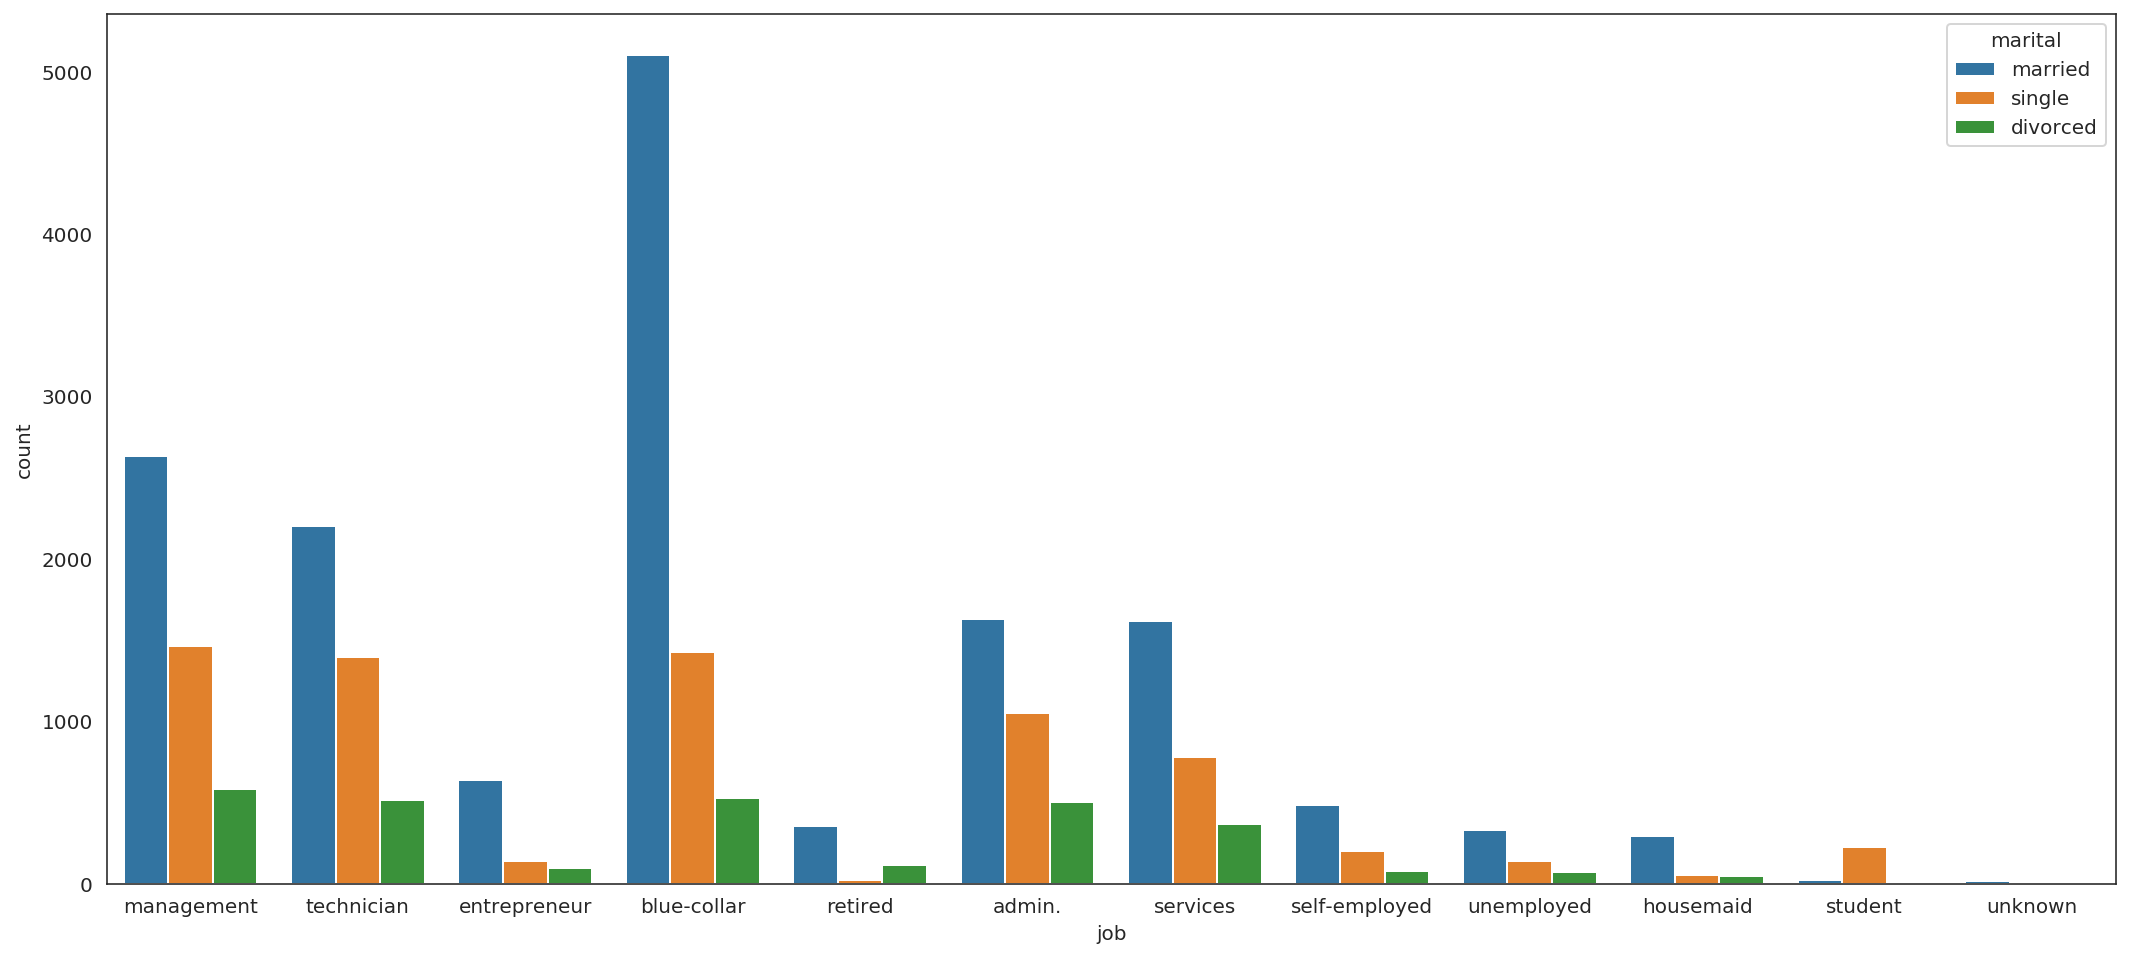

In [42]:
plt.figure(figsize=(18,8))
sns.countplot(x='job', data=df_housing, hue='marital')

### Grande parte das pessoas que possuem empréstimo imobiliário são casados, e a profissão mais recorrente é blue-collar

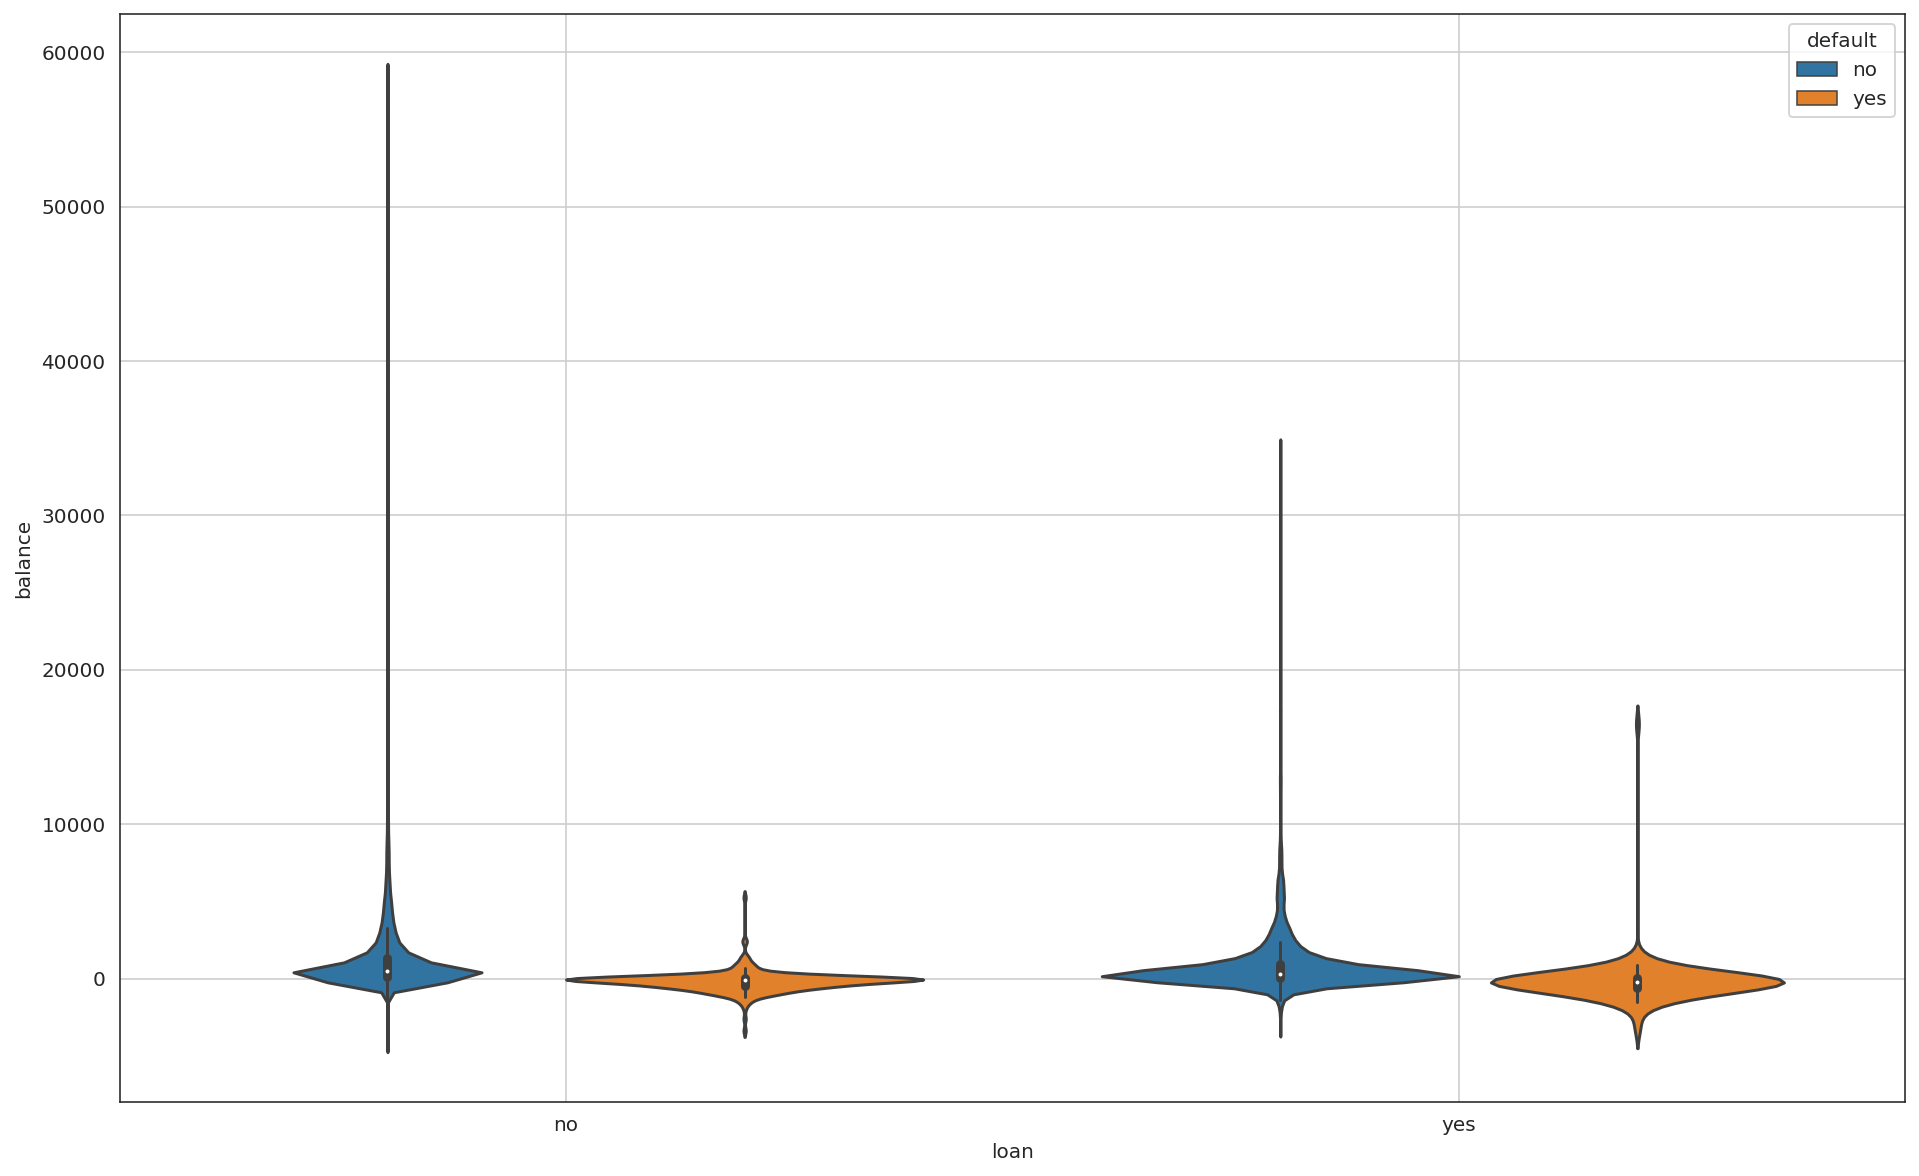

In [43]:
plt.figure(figsize=(16,10))
sns.violinplot(x='loan', y='balance',data=df_housing, hue='default')
plt.grid()

### A distribuição das pessoas que possuem um empréstimo imobiliário para empréstimo normal em relação ao balanço da conta bancária é igualmente distribuida, ou seja, pouco importa o valor da conta bancária para a pessoa realizar um empréstimo